<a href="https://colab.research.google.com/github/VanajaT/DDoS-Attack-SDN/blob/main/SDN_DDoS_ML__project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("dataset.csv")


In [ ]:
df.shape


(104345, 20)

In [ ]:
features= ['dt','switch','pktcount','bytecount','dur','dur_nsec',	'tot_dur','flows','packetins','pktperflow','byteperflow','pktrate','Pairflow','Protocol','port_no','tx_bytes','rx_bytes']
df.Protocol[df.Protocol == 'UDP'] = 1
df.Protocol[df.Protocol == 'TCP'] = 2
df.Protocol[df.Protocol == 'ICMP'] = 3
print(df)

In [ ]:
df.head(10)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,1,3,143928631,3917,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,1,4,3842,3520,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,1,3795,1242,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,2,3688,1492,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,3,3413,3665,0
5,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,1,3795,1402,0
6,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,1,4,3665,3413,0
7,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,1,1,3775,1492,0
8,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,1,2,3845,1402,0
9,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,4,354583059,4295,0


In [ ]:
df.tail(5)


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,3,1,15209,12720,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,3,3,15099,14693,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3,2,3409,3731,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3,1,15209,12720,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3,3,15099,14693,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

ANALYSING TARGET VARIABLE

In [ ]:
dataset["label"].unique()


array([0, 1])

EXPLORING THE TARGET VARIABLE

0    63561
1    40784
Name: label, dtype: int64


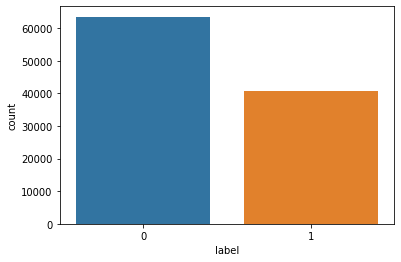

In [ ]:
y = dataset["label"]

sns.countplot(y)


label_temp = dataset.label.value_counts()

print(label_temp)


In [ ]:
x = df[features]
y = df.label

TRAIN AND TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=0)


In [ ]:
X_train.shape


(73041, 17)

In [ ]:
X_test.shape


(31304, 17)

MODEL FITTING

In [ ]:
from sklearn.metrics import accuracy_score


**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)


In [ ]:
Y_pred_nb.shape


(31304,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_test,Y_pred_nb)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(Y_test,Y_pred_nb))

The accuracy score achieved using Naive Bayes is: 63.58 %
Confusion matrix: 
 [[15667  3599]
 [ 7802  4236]]
Classification report: 
               precision    recall  f1-score   support

           0       0.67      0.81      0.73     19266
           1       0.54      0.35      0.43     12038

    accuracy                           0.64     31304
   macro avg       0.60      0.58      0.58     31304
weighted avg       0.62      0.64      0.62     31304



**K-NEAREST NEIGHBOUR CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)


In [ ]:
Y_pred_knn.shape


(31304,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_test,Y_pred_knn)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(Y_test,Y_pred_knn))


The accuracy score achieved using KNN is: 87.7 %
Confusion matrix: 
 [[17824  1442]
 [ 2408  9630]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90     19266
           1       0.87      0.80      0.83     12038

    accuracy                           0.88     31304
   macro avg       0.88      0.86      0.87     31304
weighted avg       0.88      0.88      0.88     31304



**AdaBoot CLASSIFIER**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=10,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = model.predict(X_test)

In [ ]:
score_abc = round(accuracy_score(Y_pred,Y_test)*100,2)

print("The accuracy score achieved using AdaBoostClassifier is: "+str(score_abc)+" %")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(Y_test,Y_pred))

The accuracy score achieved using AdaBoostClassifier is: 97.25 %
Confusion matrix: 
 [[18534   732]
 [  129 11909]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     19266
           1       0.94      0.99      0.97     12038

    accuracy                           0.97     31304
   macro avg       0.97      0.98      0.97     31304
weighted avg       0.97      0.97      0.97     31304



**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
model = svc.fit(X_train,Y_train)
Y_pred_svc = model.predict(X_test)

In [ ]:
score_svc = round(accuracy_score(Y_pred_svc,Y_test)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svc)+" %")

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(Y_test,Y_pred_svc)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(Y_test,Y_pred_svc))

The accuracy score achieved using SVM is: 67.78 %
Confusion matrix: 
 [[14397  4869]
 [ 5217  6821]]
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74     19266
           1       0.58      0.57      0.57     12038

    accuracy                           0.68     31304
   macro avg       0.66      0.66      0.66     31304
weighted avg       0.68      0.68      0.68     31304



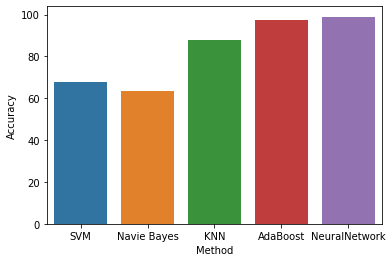

In [ ]:
data= [['SVM',68],['Navie Bayes',63.58],['KNN',87.7],['AdaBoost',97.25], ['NeuralNetwork',99]]
accuracy_compare = pd.DataFrame(data, columns = ['Method', 'Accuracy'])

sns.barplot(x=accuracy_compare['Method'],y=accuracy_compare['Accuracy'])
plt.show()